# Aula 5.1 - Análise Exploratória de Dados em Python

**Conteúdo**

- Obtenção de dados
- Limpeza de Dados
- Análise univariada
- Análise bivariada
- Análise multivariada

Material baseado no tutorial [Exploratory Data Analysis(EDA): Python, de Kaushik Katari](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14), consultado em 25/11/2020.

## O que é Análise Exploratória de Dados (EDA)?
*EDA é a abreviação de Exploratory Data Analysis*

Se quisermos explicar o EDA em termos simples, isso significa tentar entender os dados fornecidos.
Podemos encontrar uma definição mais formal na Wikipedia.

> Em estatística, a análise exploratória de dados é uma abordagem para analisar conjuntos de dados para resumir suas características principais, geralmente com métodos visuais. Um modelo estatístico pode ser usado ou não, mas principalmente a EDA serve para ver o que os dados podem nos dizer além da modelagem formal e do teste de hipótese.

EDA em Python usa visualização de dados para desenhar padrões e percepções significativas. Também envolve a preparação de conjuntos de dados para análise, removendo irregularidades nos dados.

Com base nos resultados da EDA, as empresas também tomam decisões de negócios, que podem repercutir posteriormente.
Se o EDA não for feito corretamente, ele pode dificultar as etapas seguintes no processo de construção do modelo de aprendizado de máquina.
Se bem feito, pode melhorar a eficácia de tudo o que fizermos a seguir.

## 1. Obtenção de dados
Data Sourcing é o processo de localização e carregamento dos dados no sistema. Em termos gerais, existem duas maneiras de localizar dados.
- Dados Privados
- Dados Públicos

### Dados Privados
Como o nome sugere, os dados privados são fornecidos por organizações privadas. Existem algumas questões de segurança e privacidade associadas a ele. Este tipo de dados é usado principalmente para análises internas de organizações.
### Dados Públicos
Este tipo de dados está disponível para todos. Podemos encontrar isso em sites do governo e organizações públicas, etc. Qualquer pessoa pode acessar esses dados, não precisamos de nenhuma permissão especial ou aprovação.
Podemos obter dados públicos nos seguintes sites.
#### Brasil
- [Conjuntos de Dados do Governo Federal](https://dados.gov.br/dataset)
- [Conjuntos de Dados do Governo do Estado de SP](http://www.governoaberto.sp.gov.br)
- [Conjuntos de Dados do Governo da Prefeitura de SP](http://dados.prefeitura.sp.gov.br/pt_PT/)
- [Repositório de Dados Eleitorais](https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1/repositorio-de-dados-eleitorais)
- [Data Viva - Dados Sociais e Econômicos](http://dataviva.info/pt/data/)

#### Exterior
- [Conjunto de Dados do Governo dos EUA](https://catalog.data.gov/dataset)
- [Conjunto de Dados do Governo Britânico](https://data.gov.uk)
- [Conjunto de Dados do Governo da Índia](https://data.gov.in)
- [Kaggle: site de competição de Machine Learning](https://www.kaggle.com/datasets)
- [Conjuntos de Dados da Universidade da Califórnia - Irvine](https://archive.ics.uci.edu/ml/index.php)
- [Coletânea de Datasets Públicos](https://github.com/awesomedata/awesome-public-datasets)

A primeira etapa do EDA é o Data Sourcing, vimos como podemos acessar os dados e carregá-los em nosso sistema. Agora, a próxima etapa é como limpar os dados.

## 2. Limpeza de dados

Após concluir o Data Sourcing, a próxima etapa no processo de EDA é a limpeza de dados. É muito importante eliminar as irregularidades e limpar os dados depois de colocá-los em nosso sistema.
As irregularidades são de diferentes tipos de dados.
- Valores Ausentes
- Formato Incorreto
- Cabeçalhos Incorretos
- Anomalias / Outliers

Para realizar a limpeza de dados, estamos usando um conjunto de dados de amostra, que você fez download junto com este notebook.

Primeiro, vamos importar as bibliotecas necessárias e armazenar os dados em nosso sistema para análise.

In [ ]:
#importar as bibliotecas de análise e visualização de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#imprimir os gráficos sem show
%matplotlib inline

Importe os dados do arquivo `marketing_analysis.csv` para a variável `data` e examine os dados.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ler o conjunto de dados "Marketing Analysis" para a variável data
data = pd.read_csv('/content/drive/MyDrive/2022_2_extensao_adp/datasets/Marketing_Analysis.csv')
# mostrar os dados
data

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45208,45207,51.0,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45209,45208,71.0,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45210,45209,72.0,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45211,45210,57.0,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


Se observarmos o conjunto de dados acima, existem algumas discrepâncias no cabeçalho da coluna para as 2 primeiras linhas. Os dados corretos são do número de índice 1. Portanto, temos que corrigir as duas primeiras linhas.
Vamos ignorar as duas primeiras linhas e carregar os dados novamente.

In [ ]:
# ler novamente o arquivo pulando as duas primeiras linhas
data = pd.read_csv('/content/drive/MyDrive/2022_2_extensao_adp/datasets/Marketing_Analysis.csv', skiprows=2)
# imprimir o head do arquivo
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


A seguir estão as etapas a serem seguidas ao *consertar linhas e colunas*:

1. Exclua linhas e colunas de resumo no conjunto de dados.
2. Exclua as linhas de cabeçalho e rodapé em todas as páginas.
3. Exclua linhas extras como linhas em branco, números de página, etc.
4. Podemos mesclar colunas diferentes se isso permitir uma melhor compreensão dos dados
5. Da mesma forma, também podemos dividir uma coluna em várias colunas com base em nossos requisitos ou compreensão.
6. Adicione nomes de coluna, é muito importante ter nomes de coluna no conjunto de dados.

Agora, se observarmos o conjunto de dados acima, a coluna `customerid` não tem nenhuma importância para nossa análise, e também a coluna `jobedu` contém as informações de emprego e educação.
Então, o que vamos fazer é eliminar a coluna `customerid` e dividir a coluna `jobedu` em duas outras colunas trabalho e educação e, depois disso, eliminaremos a coluna `jobedu` também.

In [ ]:
# dropar a coluna costumerid
data.drop('customerid', axis=1, inplace=True)
# extrair job e education de jobedu, criando estas duas colunas
data['job'] = data['jobedu'].apply(lambda x:x.split(',')[0])
data['education'] = data['jobedu'].apply(lambda x:x.split(',')[1])
# dropar jobedu
data.drop('jobedu', axis=1, inplace=True)
# imprimir o data set
data

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51.0,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,71.0,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,72.0,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,57.0,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


### Valores ausentes
Se houver valores ausentes no conjunto de dados, antes de fazer qualquer análise estatística, precisamos lidar com esses valores ausentes.
Existem basicamente três tipos de valores ausentes.
- *MCAR* (*Missing completely at random*, ou ausente completamente ao acaso): esses valores não dependem de nenhum outra feature do dataset.
- *MAR* (*Missing at random*, ou ausente aleatoriamente): esses valores podem depender de algumas outras features do dataset.
- *MNAR* (*Missing not at random*, ou ausente, não aleatório): esses valores ausentes têm algum motivo para estarem ausentes.

Veja mais no artigo [Safe handling intructions for missing data, de D. Niederhut](http://conference.scipy.org/proceedings/scipy2018/pdfs/dillon_niederhut.pdf)

Vamos ver quais colunas têm valores ausentes no conjunto de dados.

In [ ]:
# verificar os valores faltantes
data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Como podemos ver, três colunas contêm valores ausentes. Vamos ver como lidar com eles. Podemos lidar com valores ausentes eliminando os registros ausentes ou imputando os valores.

### Eliminando os valores ausentes

Vamos lidar com os valores ausentes na coluna idade.

In [ ]:
# dropar os registros com a idade faltando
data = data[~data.age.isnull()].copy()
# verificar de novo os valores faltantes
data.isnull().sum()

age           0
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

Vamos atribuir valores aos valores ausentes para a coluna do mês.
Como a coluna do mês é de um tipo de objeto, vamos calcular a moda dessa coluna e imputar esses valores aos valores ausentes.

In [ ]:
# Encontrar a moda (valor mais frequente) da coluna month
month_mode = data.month.mode()[0]
month_mode

'may, 2017'

In [ ]:
# Preencher os valores faltantes com o valor da moda do mês em data.
data.month.fillna(month_mode, inplace = True)

In [ ]:
# Vamos ver os valores nulos da coluna month
data.month.isnull().sum()

0

Tratamento dos valores ausentes na coluna `response`. Este conjunto de dados é referente a uma campanha de marketing, e a tarefa seguinte a esta EDA será a criação de um modelo preditivo de classificação de dados, e a coluna alvo desta classificação é justamente a coluna `response`, que diz se o cliente aceitou ou não a oferta.

Portanto, se imputarmos valores a esta coluna, isso afetará nossa análise. Portanto, é melhor eliminar os valores ausentes da coluna `response`.

In [ ]:
# dropar as linhas sem o valor de response
data = data[~data.response.isnull()].copy()
# verificar de novo os valores faltantes
data.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
job          0
education    0
dtype: int64

Também podemos preencher os valores ausentes como `NaN` para que, ao fazer qualquer análise estatística, isso não afete o resultado.

### Tratamento de outliers

Vimos como corrigir os valores ausentes, agora vamos ver como lidar com outliers no conjunto de dados.

> Outliers são os valores que estão muito além dos pontos de dados mais próximos.

Existem dois tipos de outliers:

- **Outliers univariados**: outliers univariados são os pontos de dados cujos valores estão além da faixa de valores esperados com base em uma variável.

- **Outliers multivariados**: durante a plotagem de dados, alguns valores de uma variável podem não estar além do intervalo esperado, mas quando você plota os dados com alguma outra variável, esses valores podem estar longe do valor esperado.

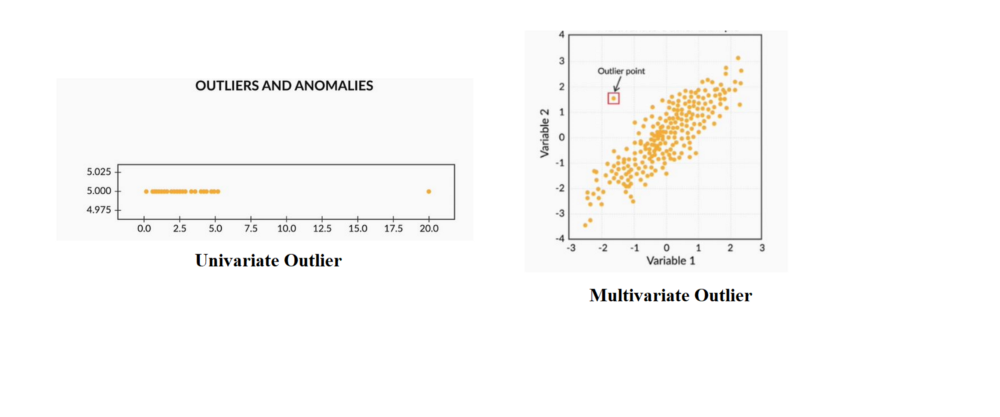

Portanto, depois de entender as causas desses outliers, podemos lidar com eles descartando esses registros ou imputando os valores ou deixando-os como estão, se fizer mais sentido.

### Padronizando Valores

Para realizar a análise de dados em um conjunto de valores, temos que nos certificar de que os valores na mesma coluna devem estar na mesma escala. Por exemplo, se os dados contiverem os valores da velocidade máxima dos carros de diferentes empresas, toda a coluna deve estar na escala de km/h ou milhas/h.

A coluna `duration` do nosso conjunto de dados tem valores em segundos e valores em minutos. Vamos padronizar a duração em segundos.

In [ ]:
# criar uma coluna com o tempo de ligação em segundos
data['dur_sec'] = data['duration'].apply(lambda x: float(x.split()[0]) if x.split()[1] == 'sec' else float(x.split()[0])*60)
# imprimir uma amostra de 10 linhas aleatórias do arquivo
data.sample(10)

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,dur_sec
5405,30.0,20000,2080,married,yes,no,yes,no,unknown,23,"may, 2017",466 sec,2,-1,0,unknown,no,blue-collar,secondary,466.0
21530,39.0,60000,3494,married,yes,no,yes,no,cellular,19,"aug, 2017",5.73333333333333 min,4,-1,0,unknown,no,technician,secondary,344.0
11056,36.0,70000,1981,married,yes,no,no,no,unknown,17,"jun, 2017",48 sec,2,-1,0,unknown,no,services,secondary,48.0
2664,40.0,20000,598,married,yes,no,yes,no,unknown,13,"may, 2017",69 sec,11,-1,0,unknown,no,blue-collar,secondary,69.0
44488,32.0,70000,859,married,yes,no,yes,no,unknown,9,"aug, 2017",0.65 min,1,-1,0,unknown,no,services,secondary,39.0
2143,54.0,55000,208,married,yes,no,no,no,unknown,12,"may, 2017",255 sec,1,-1,0,unknown,no,retired,primary,255.0
16623,45.0,100000,0,married,yes,no,no,no,cellular,24,"jul, 2017",8.71666666666667 min,2,-1,0,unknown,no,management,tertiary,523.0
12707,39.0,100000,1007,married,yes,no,yes,no,cellular,7,"jul, 2017",86 sec,2,-1,0,unknown,no,management,tertiary,86.0
814,57.0,70000,1,married,yes,no,no,no,unknown,7,"may, 2017",852 sec,1,-1,0,unknown,no,services,secondary,852.0
19205,61.0,55000,77,married,yes,no,no,no,cellular,6,"aug, 2017",7.58333333333333 min,4,-1,0,unknown,yes,retired,secondary,455.0


Verificando agora se há ligações zeradas ou com duração negativa.

In [ ]:
# verificar ligações zeradas
data[data['dur_sec'] <= 0]['dur_sec'].count()

3

São apenas 3, então vamos olhar:

In [ ]:
# olhar o conteúdo das linhas
data[data['dur_sec'] <= 0]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education,dur_sec
6424,53.0,100000,351,married,yes,no,yes,no,unknown,27,"may, 2017",0 sec,4,-1,0,unknown,no,management,primary,0.0
22937,35.0,60000,5535,married,yes,no,no,no,cellular,26,"aug, 2017",0 min,15,-1,0,unknown,no,technician,secondary,0.0
36425,31.0,120000,162,married,yes,no,yes,yes,cellular,11,"may, 2017",0 min,2,-1,0,unknown,no,entrepreneur,secondary,0.0


Todos os três responderam não. Vamos verificar o balanceamento do conjunto de dados para decidir se apagamos estas linhas.

In [ ]:
# verificar quantas linhas há para cada resposta
data['response'].value_counts()

no     39876
yes     5285
Name: response, dtype: int64

Como no é muito maior que yes, vamos apagar estas 3 linhas.

In [ ]:
# apagar as linhas com tempo zerado
data = data[~(data.dur_sec <= 0)].copy()
# calcular de novo as linhas para cada resposta
data['response'].value_counts()

no     39873
yes     5285
Name: response, dtype: int64

Agora que sabemos como obter e limpar os dados, vamos ver como podemos analisar os dados.

## 3. Análise Univariada

Se analisarmos dados sobre uma única variável / coluna de um conjunto de dados, isso é conhecido como Análise Univariada.

### Análise univariada não ordenada categórica

Uma variável não ordenada é uma variável categórica que não possui uma ordem definida. Se tomarmos nossos dados como exemplo, a coluna de trabalho no conjunto de dados é dividida em muitas subcategorias, como técnico, operário, serviços, gerenciamento, etc. Não há peso ou medida dada a qualquer valor na coluna `job`.

Agora, vamos analisar a categoria de trabalho usando gráficos. Como `job` é uma categoria, plotaremos o gráfico de barras.

In [ ]:
# calcular as porcentagens de cada tipo de trabalho
data.job.value_counts(normalize=True)
# normalize True calcula a frequência relativa em vez da absoluta

blue-collar      0.215289
management       0.209265
technician       0.168032
admin.           0.114376
services         0.091855
retired          0.050091
self-employed    0.034855
entrepreneur     0.032840
unemployed       0.028832
housemaid        0.027415
student          0.020772
unknown          0.006378
Name: job, dtype: float64

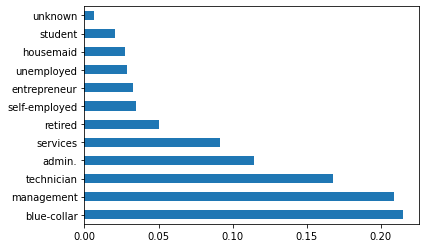

In [ ]:
# fazer o bar plot
data.job.value_counts(normalize=True).plot.barh()

Pelo gráfico de barras acima, podemos inferir que o conjunto de dados contém um maior número de operários em comparação com outras categorias.

### Análise univariada ordenada categórica

Variáveis ordenadas são aquelas variáveis que possuem uma ordem natural. Alguns exemplos de variáveis ordenadas categóricas de nosso conjunto de dados são:
- Mês: janeiro, fevereiro, março ……
- Educação: Primária, Secundária, ……

Agora, vamos analisar a Variável de Educação do conjunto de dados. Como já vimos um gráfico de barras, vamos ver como é um gráfico de pizza.

In [ ]:
#calcular a porcentagem de cada nível de educação
data.education.value_counts(normalize = True)

secondary    0.513265
tertiary     0.294211
primary      0.151424
unknown      0.041100
Name: education, dtype: float64

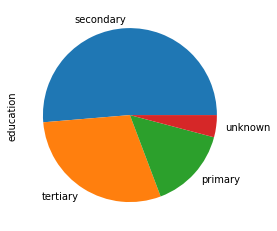

In [ ]:
# fazer o gráfico de pizza
data.education.value_counts(normalize = True).plot.pie()

Pela análise acima, podemos inferir que o conjunto de dados possui um grande número deles pertencentes ao ensino médio, depois ensino superior e, por último, fundamental. Além disso, uma porcentagem muito pequena deles é desconhecida.

É assim que analisamos a análise categórica univariada. Se a coluna ou variável for numérica, então vamos analisar calculando sua média, mediana, desvio padrão, etc. Podemos obter esses valores usando a função de descrição.

In [ ]:
# mostrar a descritiva de salário
data.salary.describe()

count     45158.000000
mean      57002.435892
std       32086.754222
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

## 4. Análise bivariada

Se analisarmos os dados levando em consideração duas variáveis / colunas de um conjunto de dados, isso é conhecido como Análise Bivariada.

### a) Análise Numérica-Numérica:

A análise das duas variáveis numéricas de um conjunto de dados é conhecida como análise numérica-numérica. Podemos analisá-las de três maneiras diferentes.

- Gráfico de dispersão
- Gráfico de pares
- Matriz de correlação

#### Gráfico de dispersão

Vamos pegar três colunas `balance`, `age` e `salary` de nosso conjunto de dados e ver o que podemos inferir traçando um gráfico de dispersão entre o saldo vs. salário e saldo vs. idade.

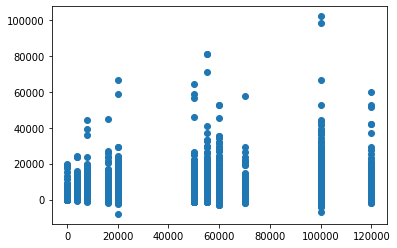

In [ ]:
# fazer o gráfico de dispersão de saldo e salário
plt.scatter(data.salary, data.balance)

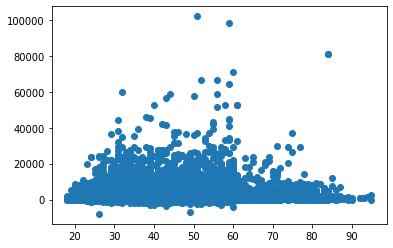

In [ ]:
# fazer o gráfico de dispersão de saldo e idade
plt.scatter(data.age, data.balance)

#### Pair Plot
Agora, vamos traçar o Pair Plot para as três colunas que usamos para traçar gráficos de dispersão. Usaremos a biblioteca *Seaborn*.

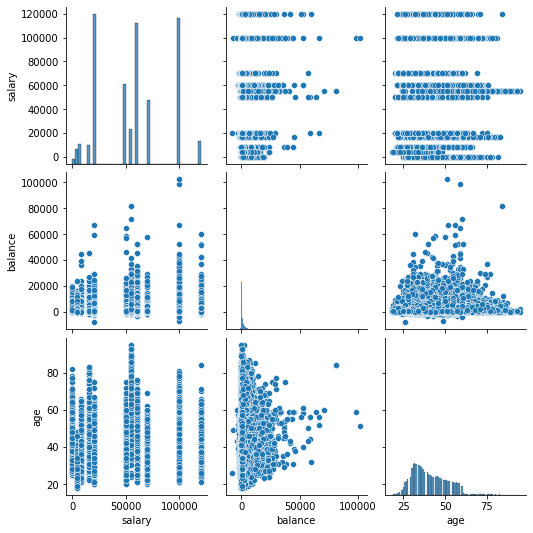

In [ ]:
#fazer o pair plot dos 3 agora, saldo, salário e idade
sns.pairplot(data = data, vars = ['salary', 'balance', 'age'])

#### Matriz de correlação
Como não podemos usar mais de duas variáveis como eixo x e y em gráficos de dispersão e pares, é difícil ver a relação entre três variáveis numéricas em um único gráfico. Nesses casos, usaremos a matriz de correlação.

In [ ]:
# criar a matriz de correlação de saldo, salário e idade
data[['salary', 'balance', 'age']].corr()

,salary,balance,age
salary,1.000000,0.055518,0.024524
balance,0.055518,1.000000,0.097733
age,0.024524,0.097733,1.000000


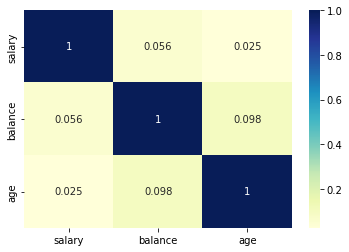

In [ ]:
# plotar o heatmap da matriz
sns.heatmap(data[['salary', 'balance', 'age']].corr(), annot=True, cmap='YlGnBu')

Primeiro, criamos uma matriz usando idade, salário e saldo. Depois disso, plotamos o mapa de calor da matriz.

### b) Análise Numérica-categórica

A análise de uma variável numérica e uma variável categórica de um conjunto de dados é conhecida como análise numérico-categórica. Nós os analisamos principalmente usando média, mediana e boxplots.

Vamos pegar as colunas de salário e resposta de nosso conjunto de dados.
Primeiro verifique o valor médio usando `groupby`.

In [ ]:
# calcular a média salarial de cada resposta
data.groupby('response')['salary'].mean()

response
no     56766.759461
yes    58780.510880
Name: salary, dtype: float64

Não há muita diferença entre a resposta sim e não com base no salário.
Vamos calcular a mediana,

In [ ]:
# calcular a mediana salarial de cada resposta
data.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

Tanto por média quanto por mediana, podemos dizer que a resposta sim e não permanece a mesma, independentemente do salário da pessoa. Mas, para ver se são iguais mesmo, vamos traçar o boxplot e verificar o comportamento.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


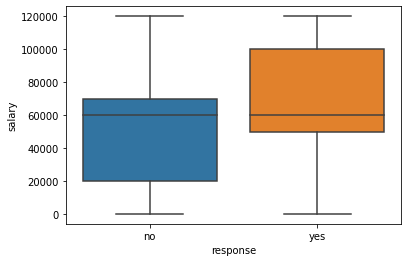

In [ ]:
# fazer o box plot de salário quebrando por resposta
sns.boxplot(data.response, data.salary)

Como podemos ver, quando plotamos o Box Plot, ele apresenta um quadro muito diferente em comparação com a média e a mediana. O intervalo inter-quartil para clientes que deram uma resposta positiva está no lado dos salários mais altos.

Como padronizamos o tempo, podemos ver agora como está a resposta com relação ao tempo de ligação.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


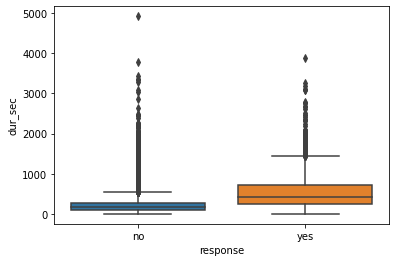

In [ ]:
# fazer o box plot de tempo quebrando por resposta
sns.boxplot(data.response, data.dur_sec)

Como a quantidade de outliers é muito grande, podemos usar log para reduzir a escala e melhorar a visualização.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


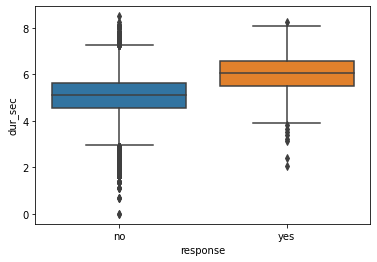

In [ ]:
# fazer o box plot de log de tempo quebrando por resposta
sns.boxplot(data.response, np.log(data.dur_sec))

Ainda não ficou bom. Vamos cortar os outliers do yes para redimensionar o gráfico.

In [ ]:
def bigodes(dataset):
    q1 = dataset.quantile(0.25)
    q3 = dataset.quantile(0.75)
    _max = dataset.max()
    _min = dataset.min()
    print('min',_min)
    iqr = q3-q1
    q_max = q3 + iqr*1.5
    q_min = q1 - iqr*1.5
    print('q_min',q_min)
    q_max = q_max if _max > q_max else _max
    q_min = q_min if _min < q_min else _min
    return(q_min, q_max)

In [ ]:
lims = bigodes(data.loc[data['response'] == 'yes', 'dur_sec'])
lims

min 7.99999999999998
q_min -477.49999999999636


(7.99999999999998, 1446.4999999999945)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


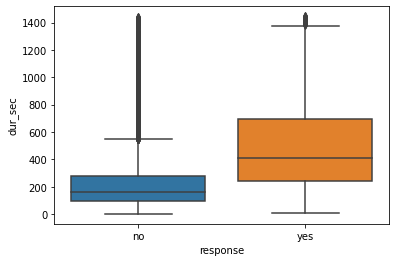

In [ ]:
# cortar em tempo < 1400 e fazer o box plot de novo, sem log
subdata = data.loc[data['dur_sec'] < lims[1]]
sns.boxplot(subdata.response, subdata.dur_sec)

Cortando na visualização, sem alterar os dados do gráfico.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[(-50.0, 1496.4999999999945)]

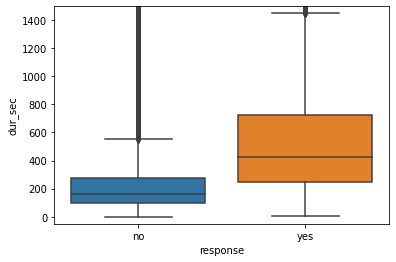

In [ ]:
ax = sns.boxplot(data.response, data.dur_sec)
#ajustando o valor dos limites para os bigodes aparecerem no gráfico
lims1 = (-50, lims[1]+50)
#mudando os limites do eixo y no gráfico
ax.set(ylim=lims1)

Já era possível ver que o tempo de conversação é um fator determinante para que a resposta seja sim, mas agora ficou bem claro que a mediana de yes é mais que o dobro da mediana de no.

É assim que analisamos as variáveis numéricas-categóricas, usando média, mediana e box plots para tirar algum tipo de conclusão.

### c) Análise Categórica-Categórica

Visto que nossa variável / coluna alvo é a taxa de resposta, veremos como as diferentes categorias, como educação, estado civil, etc., estão associadas à coluna `response`. Então, em vez de 'yes' e 'no', iremos convertê-los em '1' e '0', fazendo isso obteremos a "Taxa de resposta".

In [ ]:
# criar a coluna numérica response_rate usando 0 para yes e 1 para no
data['response_rate'] = np.where(data.response=='yes', 1, 0)
data.response_rate.value_counts()

0    39873
1     5285
Name: response_rate, dtype: int64

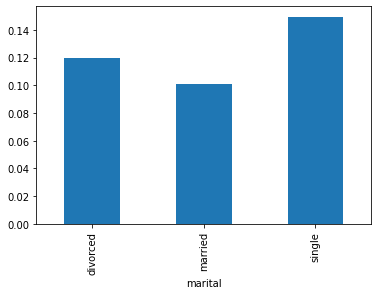

In [ ]:
# fazer um bar plot do Matplotlib da média de response_rate por estado civil
data.groupby('marital')['response_rate'].mean().plot.bar()

Poderíamos ter feito isso também usando diretamente o Seaborn, mas precisaríamos ter a coluna numérica para ele calcular a média.

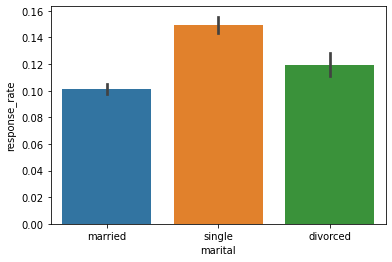

In [ ]:
# fazer de novo usando Seaborn
sns.barplot(x='marital', y='response_rate', data=data)

Fazendo a contagem dos tipos de reposta por nível educional

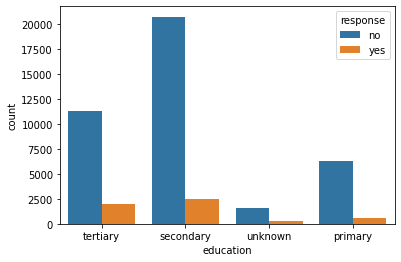

In [ ]:
# countplot dos tipos de reposta por nível educional
sns.countplot(x='education', hue='response', data=data)

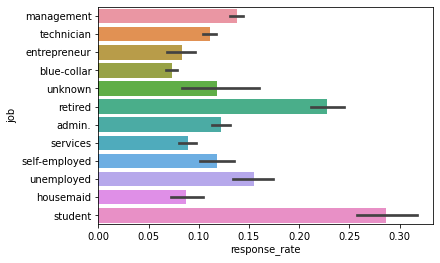

In [ ]:
# contagem dos tipos de reposta por tipo de trabalho
sns.barplot(y='job', x='response_rate', data=data)

Com o catplot poderíamos ter a comparação de contagens olhando 3 variáveis categóricas.

## 5. Análise multivariada

Se analisarmos os dados levando em consideração mais de duas variáveis / colunas de um conjunto de dados, isso é conhecido como Análise Multivariada.
Vamos ver como `education`, `marital` e `response_rate` variam entre si.
Primeiro, vamos criar uma tabela dinâmica com as três colunas e depois disso, vamos criar um mapa de calor.

In [ ]:
# fazer um pivot table de educação, estado civil e taxa de resposta
result = pd.pivot_table(data=data, index = 'education', columns='marital', values='response_rate')
print(result)

marital    divorced   married    single
education                              
primary    0.138852  0.075616  0.106808
secondary  0.103559  0.094663  0.129271
tertiary   0.137415  0.129835  0.183737
unknown    0.142012  0.122519  0.162879


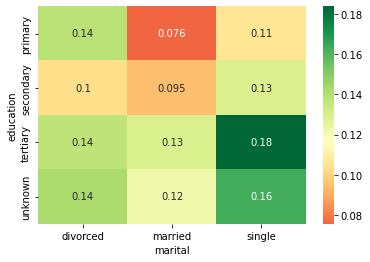

In [ ]:
# criar o heatmap
sns.heatmap(result, annot=True, cmap='RdYlGn', center=0.117)

Com base no Mapa de Calor, podemos inferir que as pessoas casadas com educação primária têm menos probabilidade de responder positivamente à pesquisa e as pessoas solteiras com educação superior têm maior probabilidade de responder positivamente à pesquisa.
Da mesma forma, podemos traçar os gráficos para Trabalho vs casamento vs resposta, Educação vs renda vs resposta, etc.

Podemos também olhar os valores absolutos com vários gráficos de barras usando catplot diretamente na variável alvo `response`.

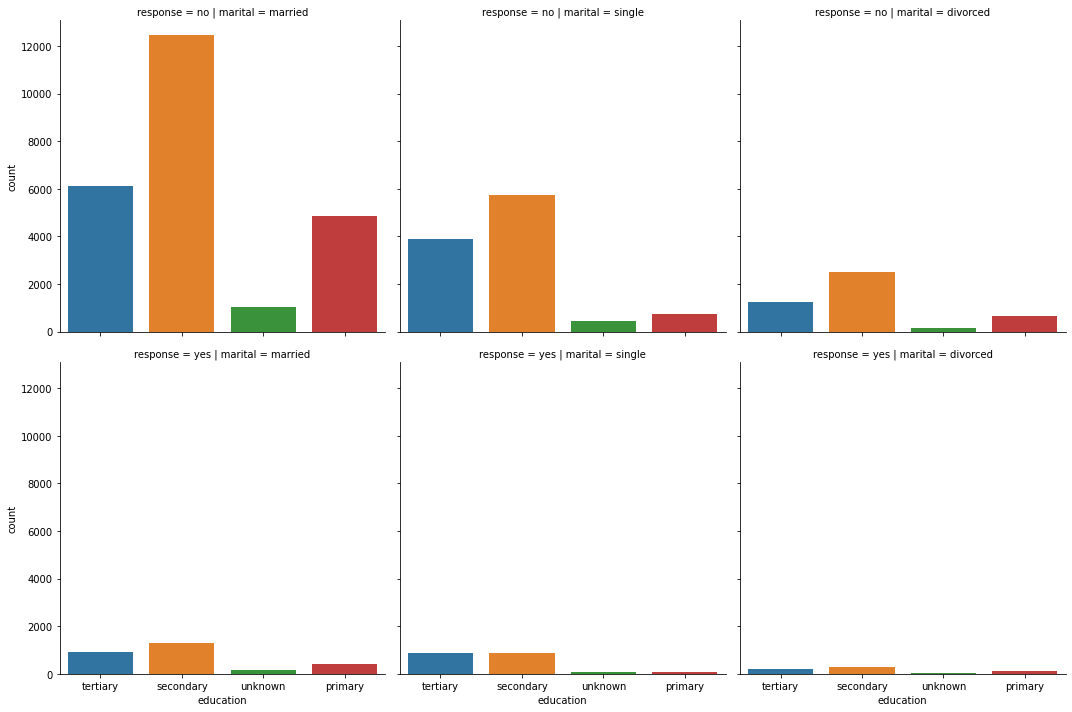

In [ ]:
# fazer um plot categórico de educação, estado civil e resposta
sns.catplot(x='education', col='marital', row='response', data=data, kind='count')

## Conclusão

Assim é feita a Análise Exploratória de Dados. A EDA nos ajuda a olhar além dos dados. Quanto mais exploramos os dados, mais percepções extraímos deles. Como analista de dados, quase 80% do nosso tempo será gasto no entendimento dos dados e na solução de vários problemas de negócios por meio de EDA.